In [1]:
import sys
sys.path.append('../src')

from pkg_torchrl.env import make_env
from pkg_ddpg_td3.utils.map_eval import *

from configs import BaseConfig

In [2]:
config = BaseConfig()
env = make_env(config, generate_map=generate_eval_map152)
env41 = make_env(config, generate_map=generate_eval_map171)

/home/tamino/dev/robot_learning/DRL-Traj-Planner/notebooks/../src/pkg_ddpg_td3/environment/environment.py:176: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return {"success": torch.tensor(self.reached_goal).unsqueeze(0),
/home/tamino/dev/robot_learning/DRL-Traj-Planner/notebooks/../src/pkg_ddpg_td3/environment/environment.py:176: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return {"success": torch.tensor(self.reached_goal).unsqueeze(0),


In [3]:
_ = env.reset()
_ = env41.reset()

In [4]:
from pkg_ddpg_td3.environment import plot
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import os
from collections import defaultdict

folder_path = "../Model/cr_experiment/trajectories"

map_list = [
    defaultdict(list),
    defaultdict(list),
]

for filename in os.listdir(folder_path):
    map_key = filename.split("(")[-1].split(",")[1].strip()
    map_idx = 0 if int(map_key) == 7 else 1

    if filename.startswith("1"):
        file_path = os.path.join(folder_path, filename)
        loaded_traj = np.loadtxt(file_path, delimiter=",")
        map_list[map_idx]['base'].append(loaded_traj)
    elif filename.startswith("2"):
        file_path = os.path.join(folder_path, filename)
        loaded_traj = np.loadtxt(file_path, delimiter=",")
        map_list[map_idx]['cr'].append(loaded_traj)

In [68]:
import matplotlib as mpl
mpl.rcParams['legend.numpoints'] = 1

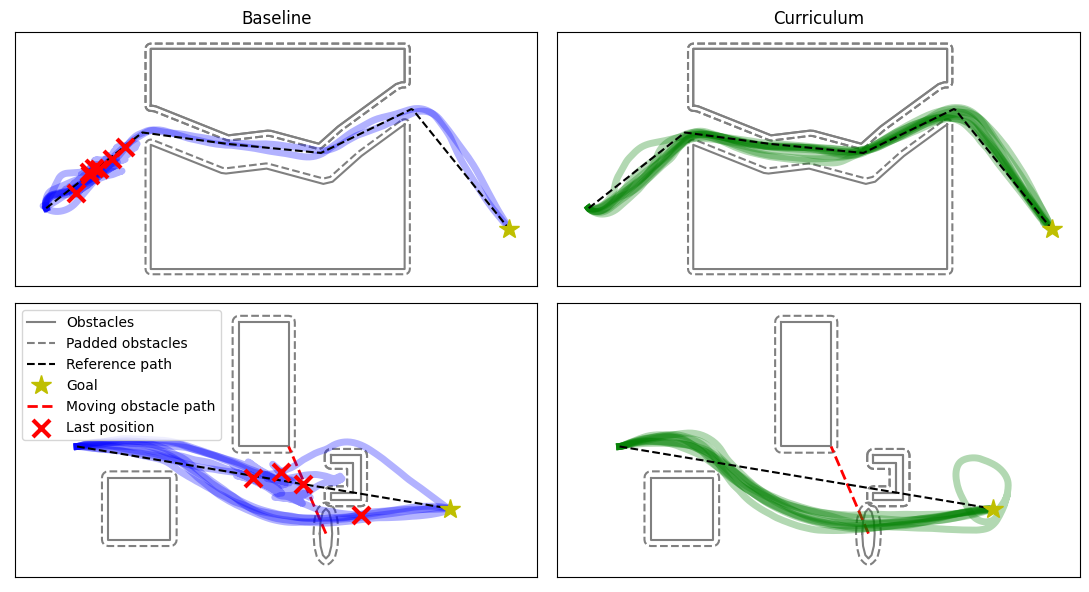

In [71]:
fig, axs = plt.subplots(2, 2, figsize=(11, 6))        

for ax in axs[0]:
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-8, 42)
    plot.obstacles(ax, env.unwrapped.obstacles, fmt='gray')
    plot.obstacles(ax, env.unwrapped.obstacles, padded=True,
                linestyle="--", label="Padded obstacles", fmt='gray')
    plot.reference_path(ax, env.unwrapped.path, zorder=4)

close_to_goal2 = False

for ax in axs[1]:
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 42)
    plot.obstacles(ax, env41.unwrapped.obstacles, fmt='gray')
    plot.obstacles(ax, env41.unwrapped.obstacles, padded=True,
                linestyle="--", label="Padded obstacles", fmt='gray')
    plot.reference_path(ax, env41.unwrapped.path, zorder=4)
    plot.line(ax, [[25., 3.], [22., 10.]], "red", linestyle="--", linewidth=2, label="Moving obstacle path")

for traj in map_list[1]['base']:
    plot.line(axs[0,0], traj, "b", alpha=0.3, linewidth=5)
    last_point = traj[-1]

    close_to_goal = np.linalg.norm(last_point - env.unwrapped.goal.position) < 1.0
    if not close_to_goal and not close_to_goal2:
        axs[0,0].scatter(last_point[0], last_point[1], marker='x',
                       color='r', s=150, linewidth=3, zorder=5)
        
for traj in map_list[1]['cr']:
    plot.line(axs[0,1], traj, "g", alpha=0.3, linewidth=5)
    last_point = traj[-1]

    close_to_goal = np.linalg.norm(last_point - env.unwrapped.goal.position) < 1.0
    if not close_to_goal and not close_to_goal2:
        axs[0,1].scatter(last_point[0], last_point[1], marker='x',
                       color='r', s=150, linewidth=3, zorder=5)

has_coll = False
for traj in map_list[0]['base']:
    plot.line(axs[1,0], traj, "b", alpha=0.3, linewidth=5)
    last_point = traj[-1]

    close_to_goal = np.linalg.norm(last_point - env41.unwrapped.goal.position) < 1.0
    if not close_to_goal and not close_to_goal2:
        if not has_coll:
            has_coll = True
            axs[1,0].scatter(last_point[0], last_point[1], marker='x',
                        color='r', s=150, linewidth=3, zorder=5, label="Last position")
        else:
            axs[1,0].scatter(last_point[0], last_point[1], marker='x',
                        color='r', s=150, linewidth=3, zorder=5)
        
for traj in map_list[0]['cr']:
    plot.line(axs[1,1], traj, "g", alpha=0.3, linewidth=5)
    last_point = traj[-1]

    close_to_goal = np.linalg.norm(last_point - env41.unwrapped.goal.position) < 1.0
    if not close_to_goal and not close_to_goal2:
        axs[1,1].scatter(last_point[0], last_point[1], marker='x',
                       color='r', s=150, linewidth=3, zorder=5)
       
axs[0,0].set_title("Baseline")
axs[0,1].set_title("Curriculum")
axs[1,0].legend(loc="upper left", numpoints=1)

plt.tight_layout()
plt.savefig("../figures/trajectory_comparison.png")
plt.show()